### DATA UPLOAD

In [25]:
import pandas as pd
df = pd.read_csv("train_and_test2.csv")
df.head()      # Display the first 5 rows of the dataset

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [6]:
df.info()      # Display information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [8]:
df.shape       # Show the shape of the dataset (number of rows, number of columns)

(1309, 28)

In [10]:
df.isnull().sum()
# Check for missing (null) values in each column
# This command returns the number of missing values per column

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

### DATA CLEANING

In [40]:
# Remove columns that contain only zeros
df_New = df.loc[:, (df != 0).any(axis=0)].copy()
df_New.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [41]:
# Check for missing (null) values after removing zero columns
df_New.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [42]:
# Fill missing values in 'Embarked' column with the most frequent value (mode)
df_New["Embarked"].fillna(df_New["Embarked"].mode()[0], inplace=True)


In [43]:
# Verify that all missing values are filled
df_New.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [44]:
# Basic descriptive statistics for numeric columns
#df_New.describe()



# Calculate basic statistical measures for the 'Age' column

# Mean: the average age
mean_age = df_New["Age"].mean()

# Median: the middle value when all ages are sorted
median_age = df_New["Age"].median()

# Variance: how much the ages spread out from the mean (unit: years²)
var_age = df_New["Age"].var()

# Standard Deviation: average distance from the mean (unit: years)
std_age = df_New["Age"].std()

# Print the calculated values
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Variance:", var_age)
print("Standard Deviation:", std_age)

# result:
# If mean and median are close → ages are evenly distributed.
# If mean > median → there are older outliers pulling the average up.


Mean Age: 29.50318563789152
Median Age: 28.0
Variance: 166.5452345687233
Standard Deviation: 12.905240585464623


In [45]:
# Compute correlation matrix
df_New.corr(numeric_only=True)


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
Passengerid,1.000000,0.025799,0.031128,-0.013406,-0.055224,0.008942,-0.038354,-0.051977,-0.331493
Age,0.025799,1.000000,0.178182,-0.053663,-0.189972,-0.125851,-0.377908,-0.063424,-0.055862
Fare,0.031128,0.178182,1.000000,0.185681,0.160349,0.221635,-0.558683,-0.238131,0.173786
Sex,-0.013406,-0.053663,0.185681,1.000000,0.109609,0.213125,-0.124617,-0.097960,0.404020
sibsp,-0.055224,-0.189972,0.160349,0.109609,1.000000,0.373587,0.060832,0.065567,-0.014375
Parch,0.008942,-0.125851,0.221635,0.213125,0.373587,1.000000,0.018322,0.044772,0.054908
Pclass,-0.038354,-0.377908,-0.558683,-0.124617,0.060832,0.018322,1.000000,0.185479,-0.244686
Embarked,-0.051977,-0.063424,-0.238131,-0.097960,0.065567,0.044772,0.185479,1.000000,-0.091394
2urvived,-0.331493,-0.055862,0.173786,0.404020,-0.014375,0.054908,-0.244686,-0.091394,1.000000


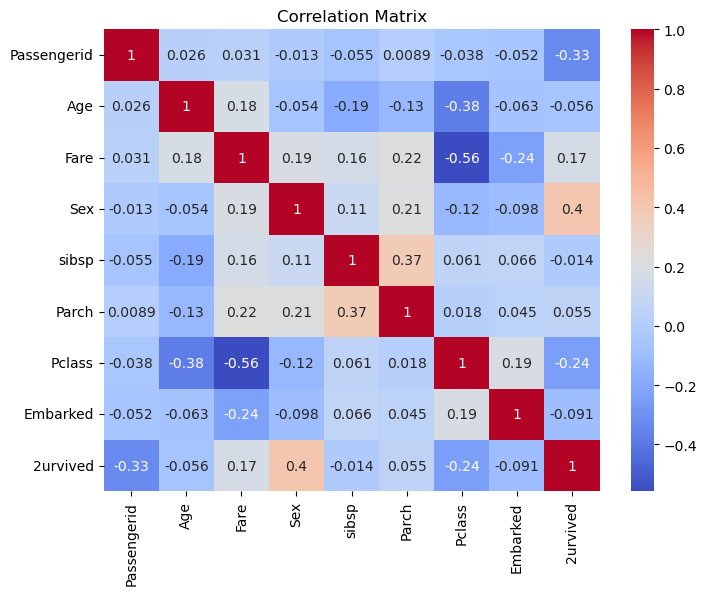

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

df_New.corr(numeric_only=True)

# Set the figure size for better readability
plt.figure(figsize=(8,6))

# Create a heatmap to visualize correlations between numeric features
# 'annot=True' adds the correlation values on the heatmap
# 'cmap="coolwarm"' defines the color palette (blue to red)
sns.heatmap(df_New.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Add a title to the plot
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()


### 📊 DATA VISUALIZATION
#### Exploring data distributions and relationships


#### 1) BASIC ANALYSIS

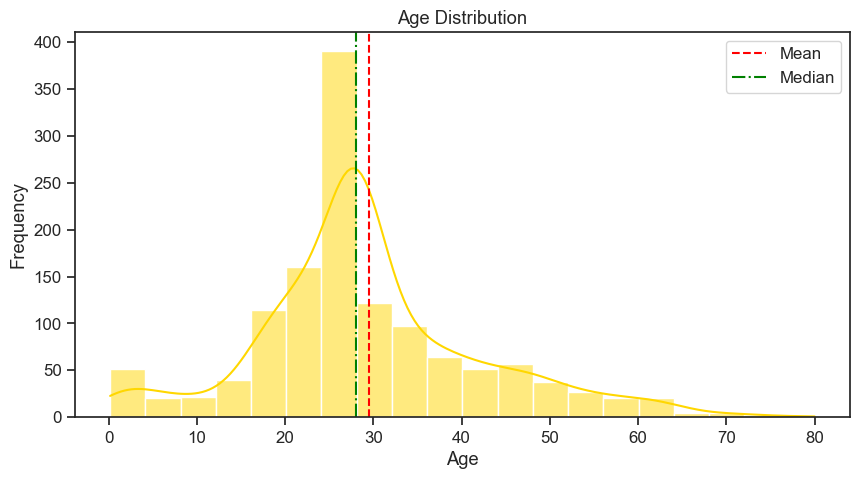

In [120]:
# --- Plot 1: Age Distribution (Histogram) ---
# Visualize how passenger ages are distributed across the dataset
plt.figure(figsize=(10,5))

sns.histplot(df_New["Age"], bins=20, kde=True, color="gold")  # Show histogram with KDE (smooth curve)
plt.axvline(df_New["Age"].mean(), color="red", linestyle="--", label="Mean")
plt.axvline(df_New["Age"].median(), color="green", linestyle="-.", label="Median")
sns.set_theme(style="ticks", palette="muted", font_scale=1.1)

plt.title("Age Distribution")                   # Add title to the chart
plt.xlabel("Age")                               # Label for the X-axis
plt.ylabel("Frequency")                         # Label for the Y-axis
plt.legend()   # Show labels

plt.show()  

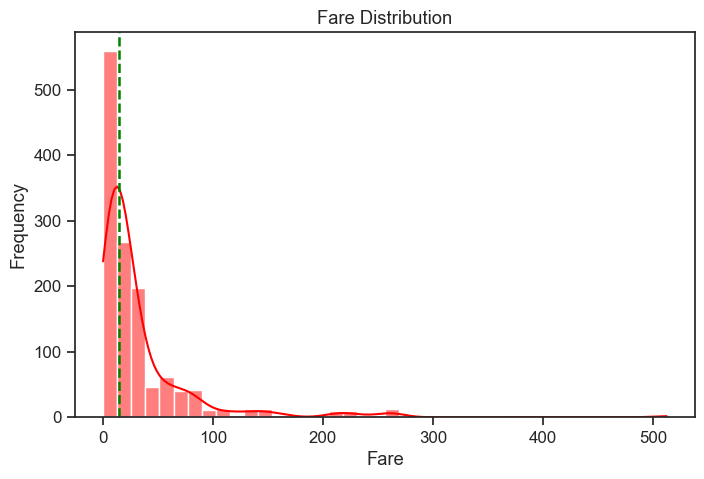

In [121]:
# --- Plot 2: Fare Distribution (Histogram) ---
# Visualize the distribution of ticket fares
plt.figure(figsize=(8, 5))
sns.histplot(df_New["Fare"], bins=40, kde=True,color="red") # More bins for smoother fare distribution

plt.axvline(df_New["Fare"].median(), color="green" , linestyle="--",linewidth=1.8 , label="median")

plt.title("Fare Distribution")                  # Add title
plt.xlabel("Fare")                              # Label for X-axis
plt.ylabel("Frequency")                         # Label for Y-axis
plt.show()                                      # Show the plot

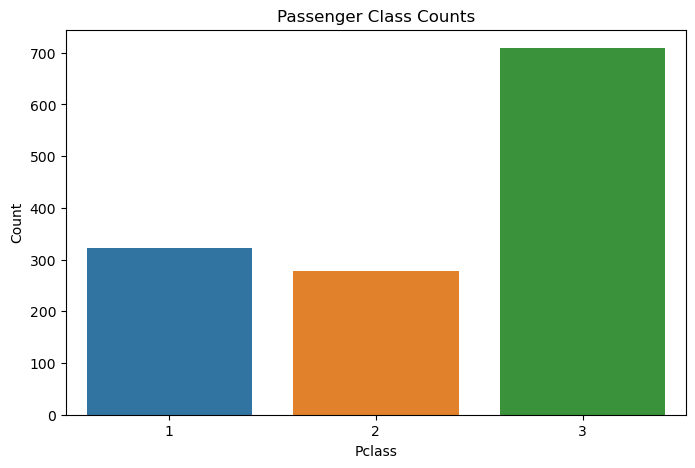

In [54]:
# --- Plot 3: Passenger Class Counts (Bar Chart) ---
# Display how many passengers belong to each passenger class (1st, 2nd, 3rd)
plt.figure(figsize=(8, 5))
sns.countplot(x="Pclass", data=df_New)          # Bar chart for class counts
plt.title("Passenger Class Counts")             # Add title
plt.xlabel("Pclass")                            # Label for X-axis
plt.ylabel("Count")                             # Label for Y-axis
plt.show()                                      # Display the chart

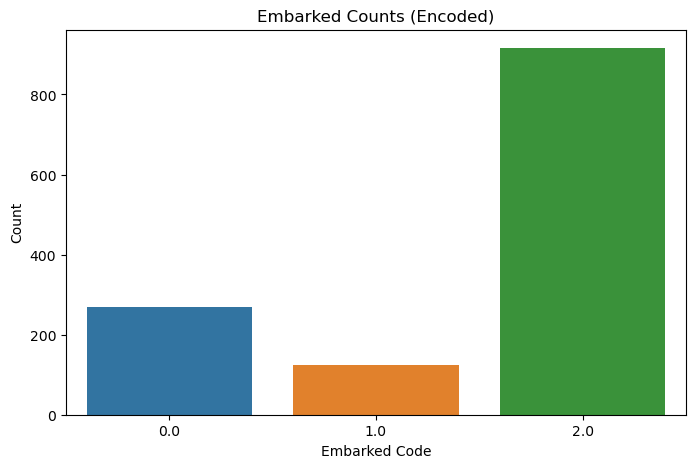

In [55]:
# --- Plot 4: Embarked Counts (Bar Chart) ---
# Show how many passengers boarded from each embarkation port (encoded as 0, 1, 2)
plt.figure(figsize=(8, 5))
sns.countplot(x="Embarked", data=df_New)        # Bar chart for embarkation counts
plt.title("Embarked Counts (Encoded)")          # Add title
plt.xlabel("Embarked Code")                     # Label for X-axis
plt.ylabel("Count")                             # Label for Y-axis
plt.show()                                      # Display the plot

#### 📈 2) RELATIONSHIP ANALYSIS (BIVARIATE VISUALIZATION)
#### Exploring how two variables relate to each other

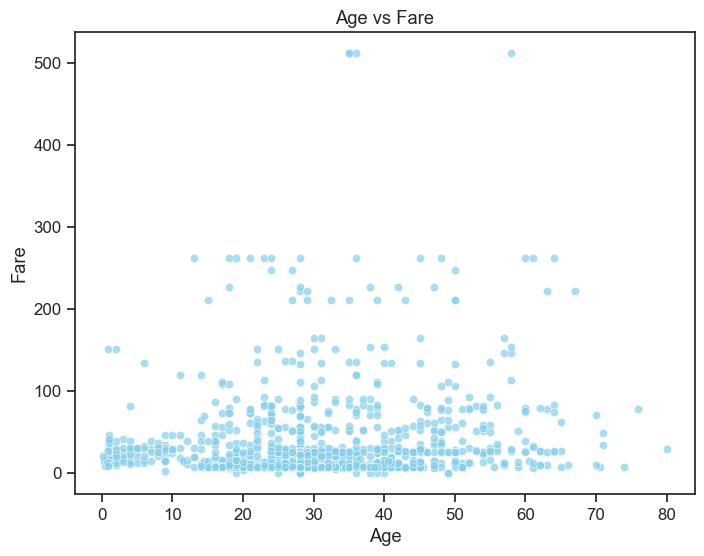

In [102]:
# --- Plot 1: Age vs Fare (Scatter Plot) ---
# Question: Do older passengers tend to pay higher fares?
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Fare", data=df_New, color="skyblue", alpha=0.7)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

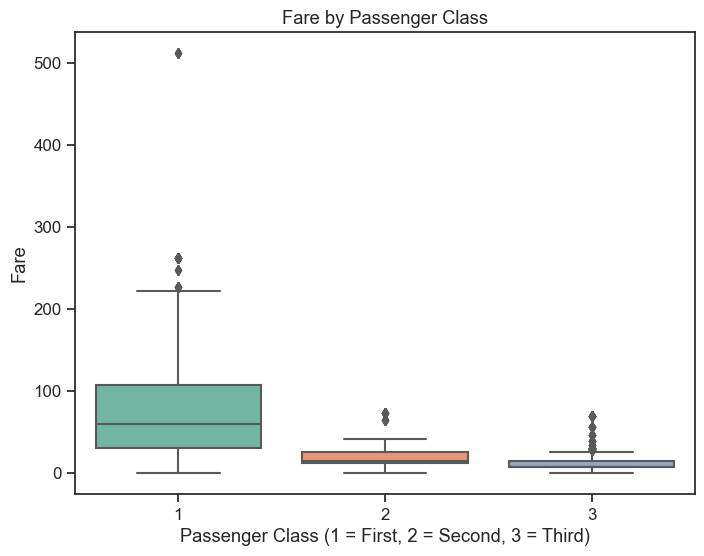

In [103]:
# --- Plot 2: Pclass vs Fare (Box Plot) ---
# Question: Does higher passenger class correspond to higher fares?
plt.figure(figsize=(8, 6))
sns.boxplot(x="Pclass", y="Fare", data=df_New, palette="Set2")
plt.title("Fare by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Fare")
plt.show()

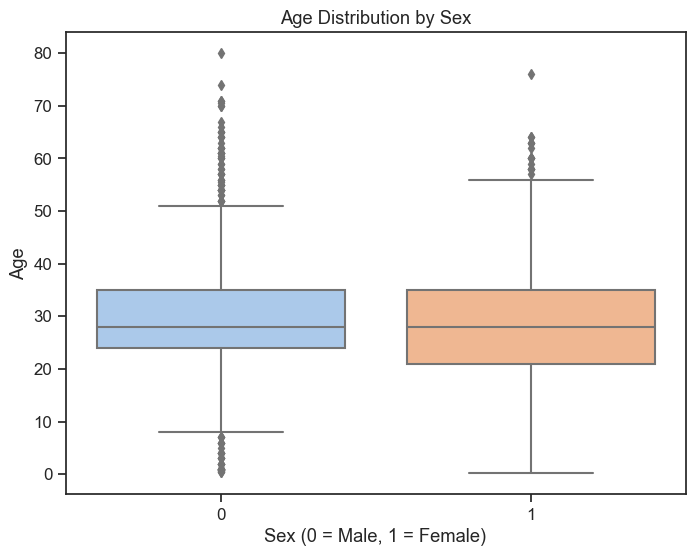

In [104]:
# --- Plot 3: Sex vs Age (Box Plot) ---
# Question: Are there age differences between male and female passengers?
plt.figure(figsize=(8, 6))
sns.boxplot(x="Sex", y="Age", data=df_New, palette="pastel")
plt.title("Age Distribution by Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Age")
plt.show()

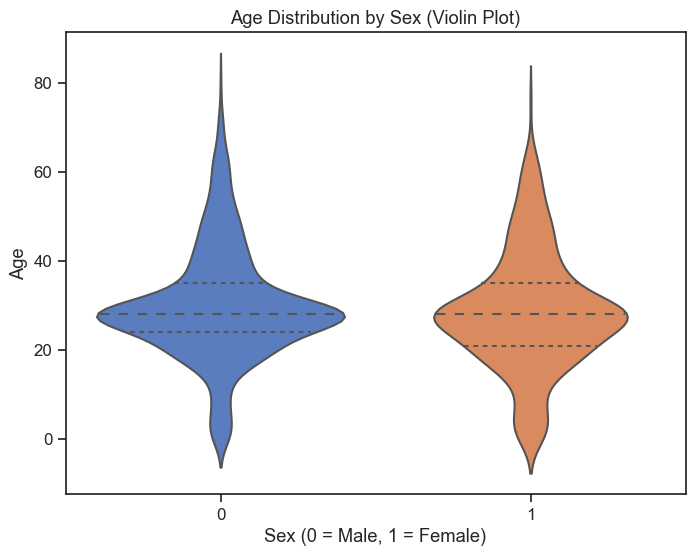

In [105]:
# --- Optional: Violin Plot (more detailed than boxplot) ---
# Combines boxplot + density shape
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sex", y="Age", data=df_New, palette="muted", inner="quart")
plt.title("Age Distribution by Sex (Violin Plot)")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Age")
plt.show()

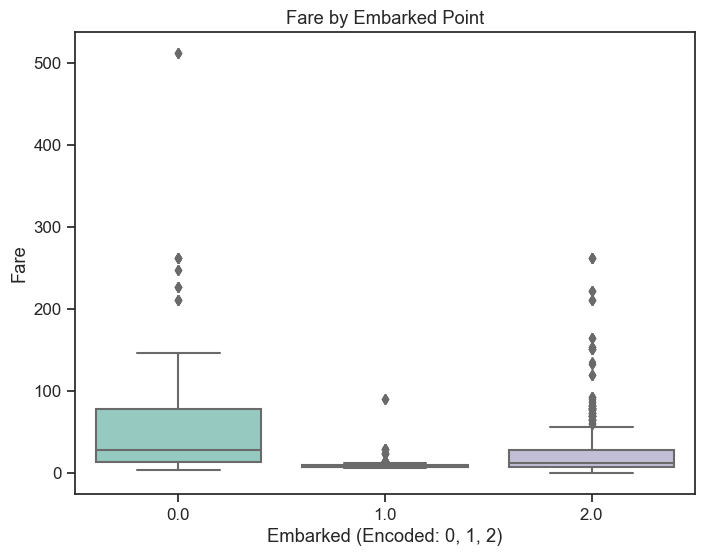

In [106]:
# --- Plot 4: Embarked vs Fare (Box Plot) ---
# Question: Do ticket fares vary by embarkation point?
plt.figure(figsize=(8, 6))
sns.boxplot(x="Embarked", y="Fare", data=df_New, palette="Set3")
plt.title("Fare by Embarked Point")
plt.xlabel("Embarked (Encoded: 0, 1, 2)")
plt.ylabel("Fare")
plt.show()

#### 🚢 3) TARGET VARIABLE ANALYSIS (SURVIVAL ANALYSIS)


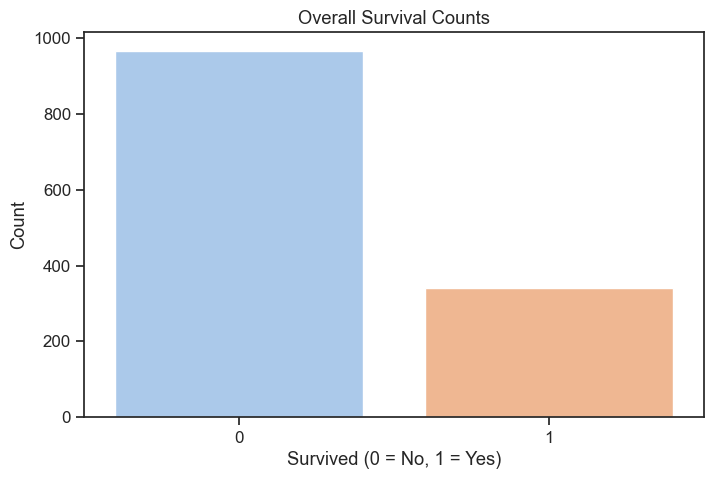

In [107]:
# it's '2urvived', rename it to 'Survived' for readability
df_New.rename(columns={"2urvived": "Survived"}, inplace=True)

# --- Plot 1: Survival Counts ---
# How many passengers survived vs did not survive
plt.figure(figsize=(8, 5))
sns.countplot(x="Survived", data=df_New, palette="pastel")
plt.title("Overall Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

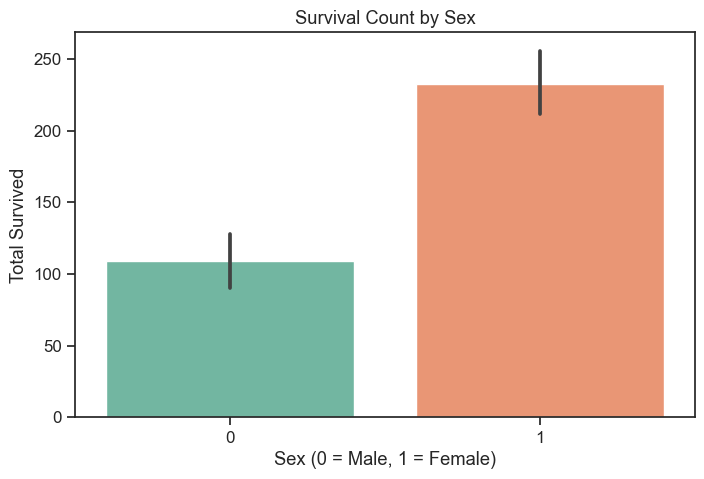

In [108]:
# --- Plot 2: Survival Rate by Sex ---
# Compare survival between male and female passengers
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Survived", data=df_New, palette="Set2", estimator=sum)
plt.title("Survival Count by Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Total Survived")
plt.show()

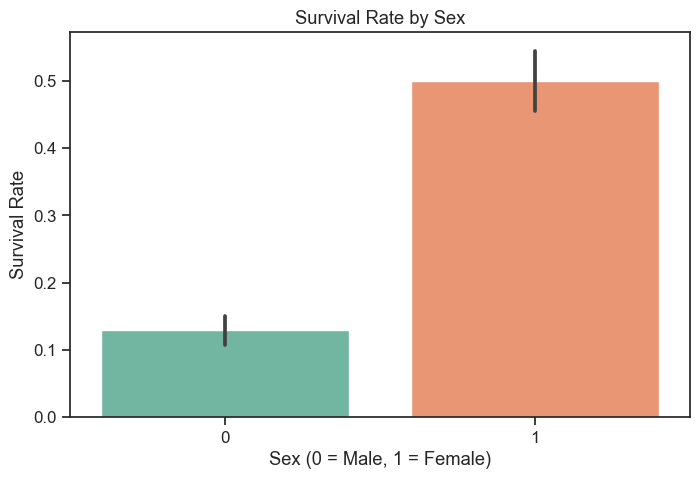

In [109]:
# Or using average rate (mean survival)
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y="Survived", data=df_New, palette="Set2")
plt.title("Survival Rate by Sex")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Survival Rate")
plt.show()

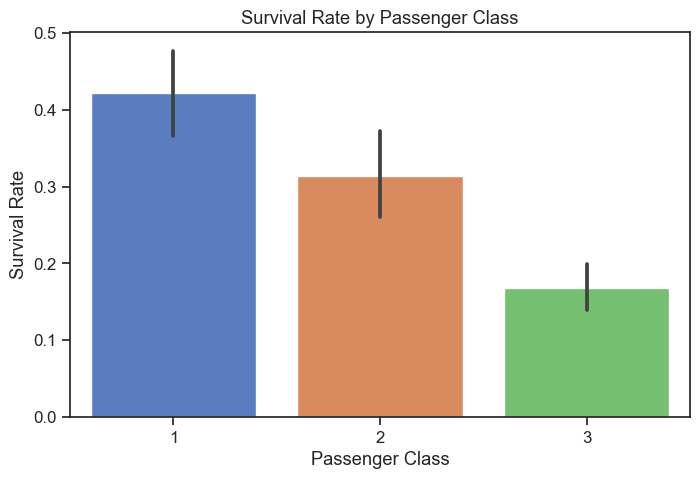

In [110]:
# --- Plot 3: Survival Rate by Passenger Class ---
# Higher classes had better survival chances?
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df_New, palette="muted")
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

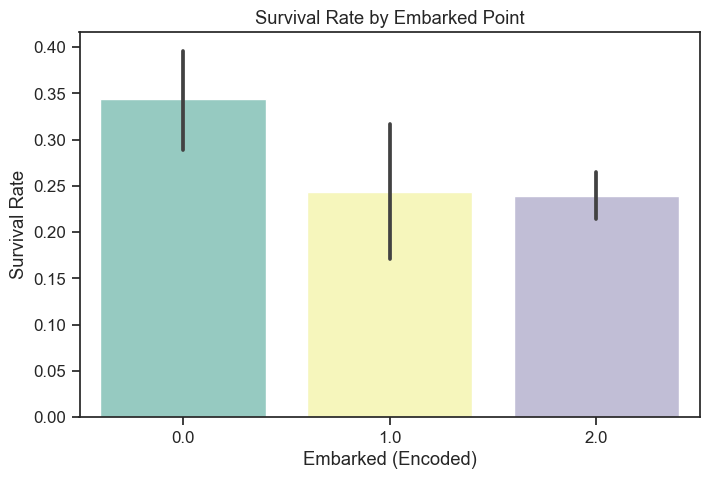

In [111]:
# --- Plot 4: Survival Rate by Embarked Port ---
# Check if embarkation port had any survival effect
plt.figure(figsize=(8, 5))
sns.barplot(x="Embarked", y="Survived", data=df_New, palette="Set3")
plt.title("Survival Rate by Embarked Point")
plt.xlabel("Embarked (Encoded)")
plt.ylabel("Survival Rate")
plt.show()

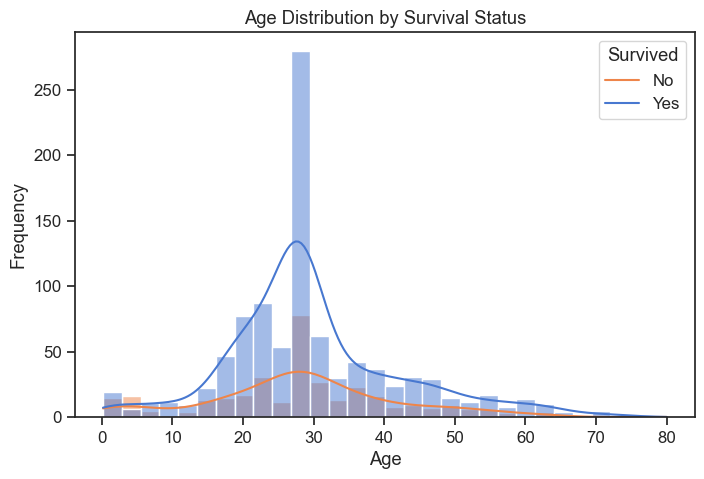

In [113]:
# --- Plot 5: Age Distribution by Survival ---
# Did younger passengers have higher survival chances?
plt.figure(figsize=(8, 5))
sns.histplot(x="Age", hue="Survived", data=df_New, bins=30, kde=True)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### 🧠 4) HYPOTHESIS TESTING


In [114]:
# Compare survival rates between male and female passengers

import scipy.stats as stats

# Separate survival data by gender
male_survived = df_New[df_New["Sex"] == 0]["Survived"]
female_survived = df_New[df_New["Sex"] == 1]["Survived"]

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(male_survived, female_survived, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → There is a statistically significant difference in survival rates between sexes.")
else:
    print("Fail to reject H₀ → No significant difference found.")


T-statistic: -14.307067052778448
P-value: 6.332507370344575e-41
Reject H₀ → There is a statistically significant difference in survival rates between sexes.


#### 🧪 5) A/B TESTING


In [115]:
# Compare survival rates between 1st and 3rd class passengers

# Define groups
group_A = df_New[df_New["Pclass"] == 1]["Survived"]   # A group: 1st class
group_B = df_New[df_New["Pclass"] == 3]["Survived"]   # B group: 3rd class

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H₀ → There is a statistically significant difference in survival between Class 1 and Class 3.")
else:
    print("Fail to reject H₀ → No significant difference found between Class 1 and Class 3.")


T-statistic: 8.196634673837774
P-value: 2.1225715550008676e-15
Reject H₀ → There is a statistically significant difference in survival between Class 1 and Class 3.


##### EXTRAS

      Metric     Value
0   Accuracy  0.763359
1  Precision  0.641026
2     Recall  0.342466
3   F1-Score  0.446429


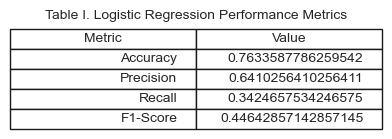

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# --- Prepare data ---
X = df_New[["Pclass", "Sex", "Age", "Fare", "Embarked"]]  # Features
y = df_New["Survived"]                                    # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --- Calculate metrics ---
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Value": [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# --- Save as Table Figure for IEEE paper ---
fig, ax = plt.subplots(figsize=(4, 1.2))
ax.axis('off')
table = ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, loc='center')

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("Table I. Logistic Regression Performance Metrics", fontsize=10, pad=10)
plt.savefig("titanic_model_metrics.png", dpi=300, bbox_inches="tight")
plt.show()
